In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
import math
import torch
import torch.nn as nn

In [2]:
N = 5
J = 1
Gamma = 1

In [3]:
nn.Linear(N, 2 * N).weight.dtype

torch.float32

In [4]:
model = nn.Sequential(
    nn.Linear(N, 2 * N),
    nn.Sigmoid(),
    nn.Linear(2 * N, 2),
    nn.Sigmoid()
)

In [5]:
print(model)

Sequential(
  (0): Linear(in_features=5, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=2, bias=True)
  (3): Sigmoid()
)


In [6]:
def expectation(psi, H):
    x = 1

In [7]:
x = torch.randn((2, 5)) 
print(x)
print(x + 1)
print(x ** 2)
print(sum(sum(x)))

tensor([[-0.1763, -0.4532,  0.1567,  0.0083, -0.6841],
        [ 0.7141,  2.2895,  0.1022, -2.2632,  0.0128]])
tensor([[ 0.8237,  0.5468,  1.1567,  1.0083,  0.3159],
        [ 1.7141,  3.2895,  1.1022, -1.2632,  1.0128]])
tensor([[3.1072e-02, 2.0536e-01, 2.4550e-02, 6.9328e-05, 4.6806e-01],
        [5.0995e-01, 5.2419e+00, 1.0442e-02, 5.1220e+00, 1.6477e-04]])
tensor(-0.2931)


In [8]:
# X = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5])
X = torch.randn((32, 5))
# y = torch.tensor([.6, .7])
y = torch.rand((32, 2))

In [9]:
print(X)
print(y)

tensor([[ 3.3823e-01,  5.8423e-02, -7.8744e-01,  1.8933e-01,  7.6320e-01],
        [-1.0917e-02, -7.2966e-01, -4.3117e-01,  6.4404e-01, -1.2215e+00],
        [-1.2172e+00, -4.7681e-01, -1.5216e+00, -3.0882e-01, -8.3840e-01],
        [ 9.5612e-01,  5.4636e-02, -8.8334e-01,  1.0193e-01,  1.3377e+00],
        [-1.2013e+00,  1.9623e-01,  9.5308e-01,  7.5492e-01, -7.9918e-01],
        [-1.2067e-01, -2.4191e-01,  2.6517e+00, -9.7426e-02,  2.1286e-01],
        [ 1.1372e+00,  7.3514e-01, -2.2788e-01,  1.1136e+00, -1.0488e+00],
        [ 1.2867e-01, -5.7566e-02, -6.6958e-01,  9.6292e-01,  3.8521e-01],
        [-3.0902e-02, -1.0811e+00,  6.8977e-01,  1.3283e+00,  1.7496e-01],
        [-6.1554e-01,  3.4714e-01,  7.3296e-02,  9.7436e-02, -1.2176e+00],
        [ 1.1169e+00,  5.4009e-01,  8.8190e-01, -2.4136e-01, -7.4446e-03],
        [-1.9776e-02, -2.5478e-01, -4.6064e-01,  4.7199e-01, -2.9869e-01],
        [-4.1002e-01,  5.4023e-01, -1.9949e+00, -3.5520e-01, -3.1528e-01],
        [-1.4138e+00,  7.

In [10]:
X.dtype

torch.float32

In [11]:
loss_fn = nn.MSELoss()
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(10000):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)

In [12]:
model[2]

Linear(in_features=10, out_features=2, bias=True)

In [13]:
model[3](model[2](model[1](model[0](X))))

tensor([[0.2629, 0.2415],
        [0.2089, 0.6722],
        [0.2973, 0.6634],
        [0.5743, 0.3812],
        [0.8706, 0.4368],
        [0.1500, 0.9144],
        [0.5944, 0.4972],
        [0.2671, 0.5458],
        [0.9742, 0.6250],
        [0.6146, 0.4377],
        [0.7279, 0.7082],
        [0.5746, 0.3641],
        [0.0402, 0.4007],
        [0.2821, 0.1953],
        [0.7725, 0.8444],
        [0.7494, 0.0726],
        [0.8049, 0.6471],
        [0.5157, 0.9203],
        [0.2933, 0.4492],
        [0.0238, 0.0869],
        [0.7075, 0.6171],
        [0.1013, 0.7701],
        [0.7421, 0.7471],
        [0.3452, 0.2547],
        [0.4730, 0.4278],
        [0.3491, 0.2481],
        [0.3073, 0.4735],
        [0.4955, 0.6255],
        [0.4088, 0.5710],
        [0.5503, 0.5180],
        [0.2030, 0.3665],
        [0.6135, 0.8364]], grad_fn=<SigmoidBackward0>)

In [14]:
model(X)

tensor([[0.2629, 0.2415],
        [0.2089, 0.6722],
        [0.2973, 0.6634],
        [0.5743, 0.3812],
        [0.8706, 0.4368],
        [0.1500, 0.9144],
        [0.5944, 0.4972],
        [0.2671, 0.5458],
        [0.9742, 0.6250],
        [0.6146, 0.4377],
        [0.7279, 0.7082],
        [0.5746, 0.3641],
        [0.0402, 0.4007],
        [0.2821, 0.1953],
        [0.7725, 0.8444],
        [0.7494, 0.0726],
        [0.8049, 0.6471],
        [0.5157, 0.9203],
        [0.2933, 0.4492],
        [0.0238, 0.0869],
        [0.7075, 0.6171],
        [0.1013, 0.7701],
        [0.7421, 0.7471],
        [0.3452, 0.2547],
        [0.4730, 0.4278],
        [0.3491, 0.2481],
        [0.3073, 0.4735],
        [0.4955, 0.6255],
        [0.4088, 0.5710],
        [0.5503, 0.5180],
        [0.2030, 0.3665],
        [0.6135, 0.8364]], grad_fn=<SigmoidBackward0>)

In [15]:
y

tensor([[0.1073, 0.1093],
        [0.0628, 0.8056],
        [0.3112, 0.6906],
        [0.8131, 0.4033],
        [0.8628, 0.4902],
        [0.1101, 0.9956],
        [0.5755, 0.5162],
        [0.2393, 0.5162],
        [0.9655, 0.6773],
        [0.5397, 0.3832],
        [0.7652, 0.5618],
        [0.6735, 0.3192],
        [0.0311, 0.4304],
        [0.2741, 0.1852],
        [0.6547, 0.9155],
        [0.7490, 0.0294],
        [0.9427, 0.5711],
        [0.5142, 0.8775],
        [0.3138, 0.4889],
        [0.0366, 0.0479],
        [0.7723, 0.5934],
        [0.2419, 0.6888],
        [0.7279, 0.8463],
        [0.3393, 0.2802],
        [0.4750, 0.4031],
        [0.3257, 0.2503],
        [0.1053, 0.5706],
        [0.4856, 0.6139],
        [0.3587, 0.4604],
        [0.5479, 0.5538],
        [0.2354, 0.4070],
        [0.7238, 0.8464]])

In [16]:
loss_fn(model(X), y)

tensor(0.0059, grad_fn=<MseLossBackward0>)

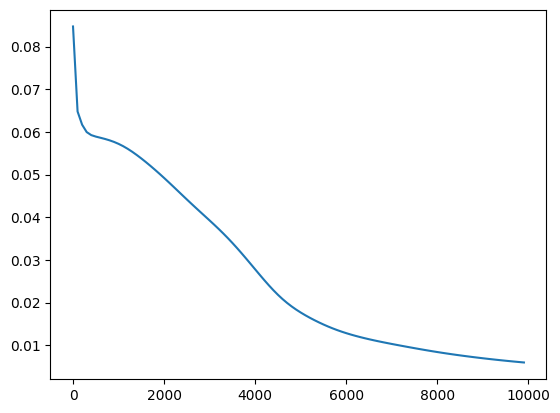

In [17]:
plt.plot(epochs, loss_data)
plt.show()

In [18]:
x = torch.rand(((5, 3)))
print(x)
print(sum(x))
print(torch.sum(x, axis = 1))

tensor([[2.3489e-01, 4.0237e-01, 8.2300e-01],
        [6.3149e-01, 5.9579e-02, 7.4761e-01],
        [6.2474e-01, 2.9385e-04, 7.3560e-02],
        [6.4885e-01, 1.6234e-01, 9.2347e-01],
        [7.3874e-01, 1.0221e-01, 3.8913e-01]])
tensor([2.8787, 0.7268, 2.9568])
tensor([1.4603, 1.4387, 0.6986, 1.7347, 1.2301])


In [19]:
(torch.zeros(5, dtype=torch.complex128) + 1.j).conj()

tensor([0.-1.j, 0.-1.j, 0.-1.j, 0.-1.j, 0.-1.j], dtype=torch.complex128)

In [20]:
(torch.ones((3, 2)) @ torch.ones((2, 5))).reshape((5, 3))

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [21]:
x = torch.rand((3, 2))
print(x)
y = x[:, 0] + 1.j * x[:, 1]
print(y)

tensor([[0.5587, 0.7627],
        [0.3342, 0.9316],
        [0.5064, 0.5878]])
tensor([0.5587+0.7627j, 0.3342+0.9316j, 0.5064+0.5878j])


In [90]:
def TFIM_multiply(psi, phi, N, J, Gamma):
    dim = 2 ** N
    for state in range(dim):
        jtotal = 0
        for site in range(N - 1):
            jtotal += J if ((state >> site) ^ (state >> (site + 1))) & 1 else -J 
        jtotal += J if ((state >> (N - 1)) ^ (state >> 0)) & 1 else -J
        phi[state] = jtotal * psi[state]
    
    for state in range(dim):
        for site in range(N):
            flipped_state = state ^ (1 << site)
            phi[flipped_state] -= Gamma*psi[state]

def expectation(nn_output, vars):
    N, J, Gamma = vars
    dim = 2 ** N
    psi = nn_output[:, 0] + 1.j * nn_output[:, 1]
    mag = sum(abs(n) ** 2 for n in psi)
    phi = torch.zeros(dim, dtype = torch.complex64)
    bra_psi = psi.reshape((1, -1)).conj()
    TFIM_multiply(psi, phi, N, J, Gamma)

    res = (bra_psi @ phi.reshape((-1, 1)))[0][0].real

    return res / mag

In [91]:
def generate_state(state_num, N):
    x = np.zeros(N)
    for n in range(N):
        x[n] = (state_num >> n) & 1
    return x

In [92]:
generate_state(0, N)

array([0., 0., 0., 0., 0.])

In [93]:
dim = 2 ** N
input = np.array([generate_state(state, N) for state in range(dim)])
input = torch.tensor(input, dtype = torch.float32)
input

tensor([[0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [0., 1., 0., 1., 0.],
        [1., 1., 0., 1., 0.],
        [0., 0., 1., 1., 0.],
        [1., 0., 1., 1., 0.],
        [0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 1.],
        [0., 1., 0., 0., 1.],
        [1., 1., 0., 0., 1.],
        [0., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1.],
        [0., 1., 1., 0., 1.],
        [1., 1., 1., 0., 1.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 1., 1.],
        [0., 1., 0., 1., 1.],
        [1., 1., 0., 1., 1.],
        [0., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [94]:
model[0].weight.dtype

torch.float32

In [95]:
input.dtype

torch.float32

In [96]:
model(input)[:, 0] + model(input)[:, 1] * 1.j

tensor([0.6550+0.4415j, 0.6595+0.4349j, 0.6685+0.4381j, 0.6730+0.4317j,
        0.6476+0.4412j, 0.6519+0.4346j, 0.6614+0.4380j, 0.6658+0.4316j,
        0.6482+0.4285j, 0.6523+0.4220j, 0.6623+0.4257j, 0.6659+0.4195j,
        0.6408+0.4286j, 0.6449+0.4222j, 0.6552+0.4260j, 0.6590+0.4200j,
        0.6483+0.4412j, 0.6531+0.4347j, 0.6610+0.4379j, 0.6661+0.4311j,
        0.6415+0.4404j, 0.6455+0.4339j, 0.6544+0.4372j, 0.6589+0.4306j,
        0.6418+0.4284j, 0.6462+0.4214j, 0.6553+0.4255j, 0.6596+0.4185j,
        0.6350+0.4279j, 0.6388+0.4211j, 0.6488+0.4253j, 0.6526+0.4186j],
       grad_fn=<AddBackward0>)

In [97]:
gs_approximator(input)

tensor([[3.4341e-02, 2.7660e-04],
        [1.0176e-02, 7.8285e-05],
        [1.0130e-02, 1.9754e-04],
        [6.7948e-03, 8.7817e-05],
        [1.0190e-02, 6.7800e-05],
        [3.4510e-03, 2.3340e-05],
        [6.7863e-03, 9.4109e-05],
        [6.9717e-03, 4.5592e-05],
        [1.0092e-02, 1.3193e-04],
        [3.6130e-03, 4.8037e-05],
        [3.7237e-03, 1.1643e-04],
        [3.7057e-03, 5.9496e-05],
        [6.8787e-03, 6.5236e-05],
        [3.7283e-03, 2.8265e-05],
        [6.9325e-03, 1.0627e-04],
        [1.0146e-02, 5.8142e-05],
        [1.0180e-02, 1.9229e-04],
        [6.6939e-03, 8.0256e-05],
        [3.5097e-03, 1.5604e-04],
        [7.0735e-03, 9.8698e-05],
        [3.4653e-03, 5.5862e-05],
        [3.7707e-03, 3.0434e-05],
        [3.7372e-03, 8.7102e-05],
        [1.0171e-02, 6.0982e-05],
        [6.8540e-03, 1.6878e-04],
        [6.9792e-03, 8.4007e-05],
        [3.7396e-03, 1.5613e-04],
        [1.0132e-02, 1.1178e-04],
        [6.9847e-03, 9.8688e-05],
        [1.015

In [249]:
N = 7
J = 1
Gamma = 1

In [250]:
dim = 2 ** N
input = np.array([generate_state(state, N) for state in range(dim)])
input = torch.tensor(input, dtype = torch.float32)

In [251]:
gs_approximator = nn.Sequential(
    nn.Linear(N, 2 * N),
    nn.Sigmoid(),
    nn.Linear(2 * N, 2),
    nn.Sigmoid()
)

In [252]:
vars = (N, J, Gamma)
loss_fn = expectation
epochs = []
loss_data = []
optimizer = torch.optim.SGD(gs_approximator.parameters(), lr = 2)
for epoch in range(1000):
    y_pred = gs_approximator(input)
    loss = loss_fn(y_pred, vars)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)

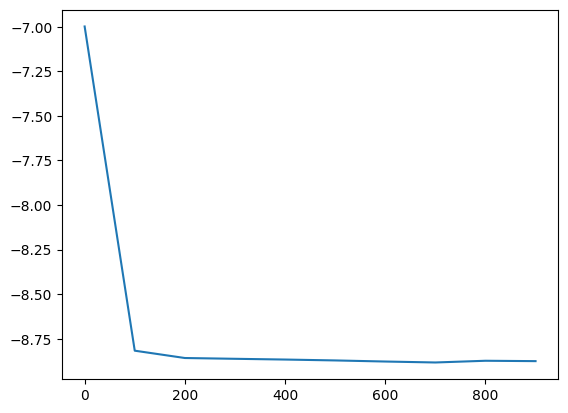

In [253]:
plt.plot(epochs, loss_data)
plt.show()

In [254]:
def TFIM_hamiltonian(n, J, gamma):
    # uses ring shape
    id = qt.qeye(2)
    z = qt.sigmaz()
    x = qt.sigmax()
    sxi = []
    szi = []
    for i in range(n):
        sxi.append(qt.tensor([id] * i + [x] + [id] * (n - i - 1)))
        szi.append(qt.tensor([id] * i + [z] + [id] * (n - i - 1)))
    return -J * sum(szi[i] * szi[i + 1] for i in range(n - 1)) - J * szi[n - 1] * szi[0] - gamma * sum(sxi[i] for i in range(n))

In [255]:
h = TFIM_hamiltonian(N, J, Gamma)
print(h.eigenstates()[0][0])

-8.98791841486986


In [256]:
loss_data[-1]

-8.875748634338379

In [257]:
pred = gs_approximator(input)
pred_gs = (pred[:, 0] + 1.j * pred[:, 1])
mag = sum(abs(n) ** 2 for n in pred_gs)
pred_gs = qt.Qobj(pred_gs.data / math.sqrt(mag))
pred_gs

Quantum object: dims=[[128], [1]], shape=(128, 1), type='ket', dtype=Dense
Qobj data =
[[0.67123318+0.00298368j]
 [0.19920997+0.0011186j ]
 [0.20032968+0.00142023j]
 [0.11686736+0.00090994j]
 [0.20121813+0.00238479j]
 [0.06140458+0.00105j   ]
 [0.11842372+0.00161192j]
 [0.07303325+0.00116501j]
 [0.19933963+0.0015114j ]
 [0.05309977+0.0005639j ]
 [0.06135928+0.00071524j]
 [0.0371892 +0.0004767j ]
 [0.12008648+0.00136309j]
 [0.03495269+0.00059091j]
 [0.0733965 +0.0009773j ]
 [0.04750657+0.00072376j]
 [0.19985831+0.00173553j]
 [0.05627258+0.00056929j]
 [0.05546719+0.00062144j]
 [0.03621406+0.00036583j]
 [0.06466608+0.00103562j]
 [0.02167487+0.00040843j]
 [0.03655378+0.00061596j]
 [0.02800982+0.00043457j]
 [0.1184921 +0.00116937j]
 [0.0361596 +0.00040455j]
 [0.03722537+0.00045256j]
 [0.02686397+0.00028027j]
 [0.07006875+0.00083547j]
 [0.023043  +0.00033108j]
 [0.04118215+0.0004744j ]
 [0.03123054+0.00032948j]
 [0.19292895+0.00073042j]
 [0.05666809+0.00030592j]
 [0.05370032+0.00038104j]
 [0

In [258]:
true_gs = h.eigenstates()[1][0]
true_gs

Quantum object: dims=[[2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1]], shape=(128, 1), type='ket', dtype=Dense
Qobj data =
[[0.48560198]
 [0.1379053 ]
 [0.1379053 ]
 [0.08462187]
 [0.1379053 ]
 [0.0441179 ]
 [0.08462187]
 [0.06937171]
 [0.1379053 ]
 [0.04134209]
 [0.0441179 ]
 [0.03164354]
 [0.08462187]
 [0.03164354]
 [0.06937171]
 [0.06937171]
 [0.1379053 ]
 [0.04134209]
 [0.04134209]
 [0.02886774]
 [0.0441179 ]
 [0.01608828]
 [0.03164354]
 [0.03164354]
 [0.08462187]
 [0.02886774]
 [0.03164354]
 [0.02886774]
 [0.06937171]
 [0.03164354]
 [0.06937171]
 [0.08462187]
 [0.1379053 ]
 [0.0441179 ]
 [0.04134209]
 [0.03164354]
 [0.04134209]
 [0.01608828]
 [0.02886774]
 [0.03164354]
 [0.0441179 ]
 [0.01608828]
 [0.01608828]
 [0.01608828]
 [0.03164354]
 [0.01608828]
 [0.03164354]
 [0.0441179 ]
 [0.08462187]
 [0.03164354]
 [0.02886774]
 [0.02886774]
 [0.03164354]
 [0.01608828]
 [0.02886774]
 [0.04134209]
 [0.06937171]
 [0.03164354]
 [0.03164354]
 [0.04134209]
 [0.06937171]
 [0.0441179 ]
 [0.0846218

In [259]:
qt.fidelity(pred_gs, true_gs)

np.float64(0.7993225437862304)